In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [7]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

# General Exploration and Cleaning

In [8]:
df.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500


In [9]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#checking for missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(20)

,Total,Percent
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garagecond,81,5.547945
garagetype,81,5.547945
garageyrblt,81,5.547945
garagefinish,81,5.547945


In [11]:
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
for i in percent:
    if i > 40:
        print(i)

99.52054794520548
96.3013698630137
93.76712328767124
80.75342465753425
47.26027397260274


We can observe that the top 5 variables in the table are missing more than 40% of datapoints. Since these features don't appear to be the top qualities of what people may prioritize when purchasing a house, we will delete these columns:
PoolQC
MiscFeature
Alley
Fence
FireplaceQu

In [12]:
df = df.drop(['poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ'], axis=1)

In [13]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'o

The rest missing values we will fill with the mean.

In [14]:
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode(), inplace=True)

In [15]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
df.isnull().sum()*100/df.isnull().count()

id               0.000000
mssubclass       0.000000
mszoning         0.000000
lotfrontage      0.000000
lotarea          0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
overallqual      0.000000
overallcond      0.000000
yearbuilt        0.000000
yearremodadd     0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
masvnrarea       0.000000
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
                   ...   
bsmtfullbath     0.000000
bsmthalfbath     0.000000
fullbath         0.000000
halfbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
kitchenqual      0.000000
totrmsabvgrd

## Split Data into Categorical and Continuous Sets

In [17]:
# Create List of Non-Numeric/Categorical Columns
categorical_columns = df.select_dtypes(['object']).columns
print(categorical_columns)
print(f"The number of categorical columns is {len(categorical_columns)}")

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive', 'saletype', 'salecondition'],
      dtype='object')
The number of categorical columns is 38


In [18]:
# Create List of Numeric Columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


# Exploratory data analysis and feature selection

Target - 'saleprice'

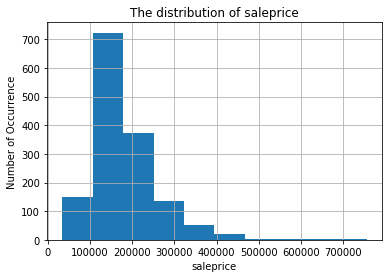

In [19]:
df.saleprice.hist()
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("Number of Occurrence")
plt.show()

In [20]:
df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

### Target vs Numeric Features

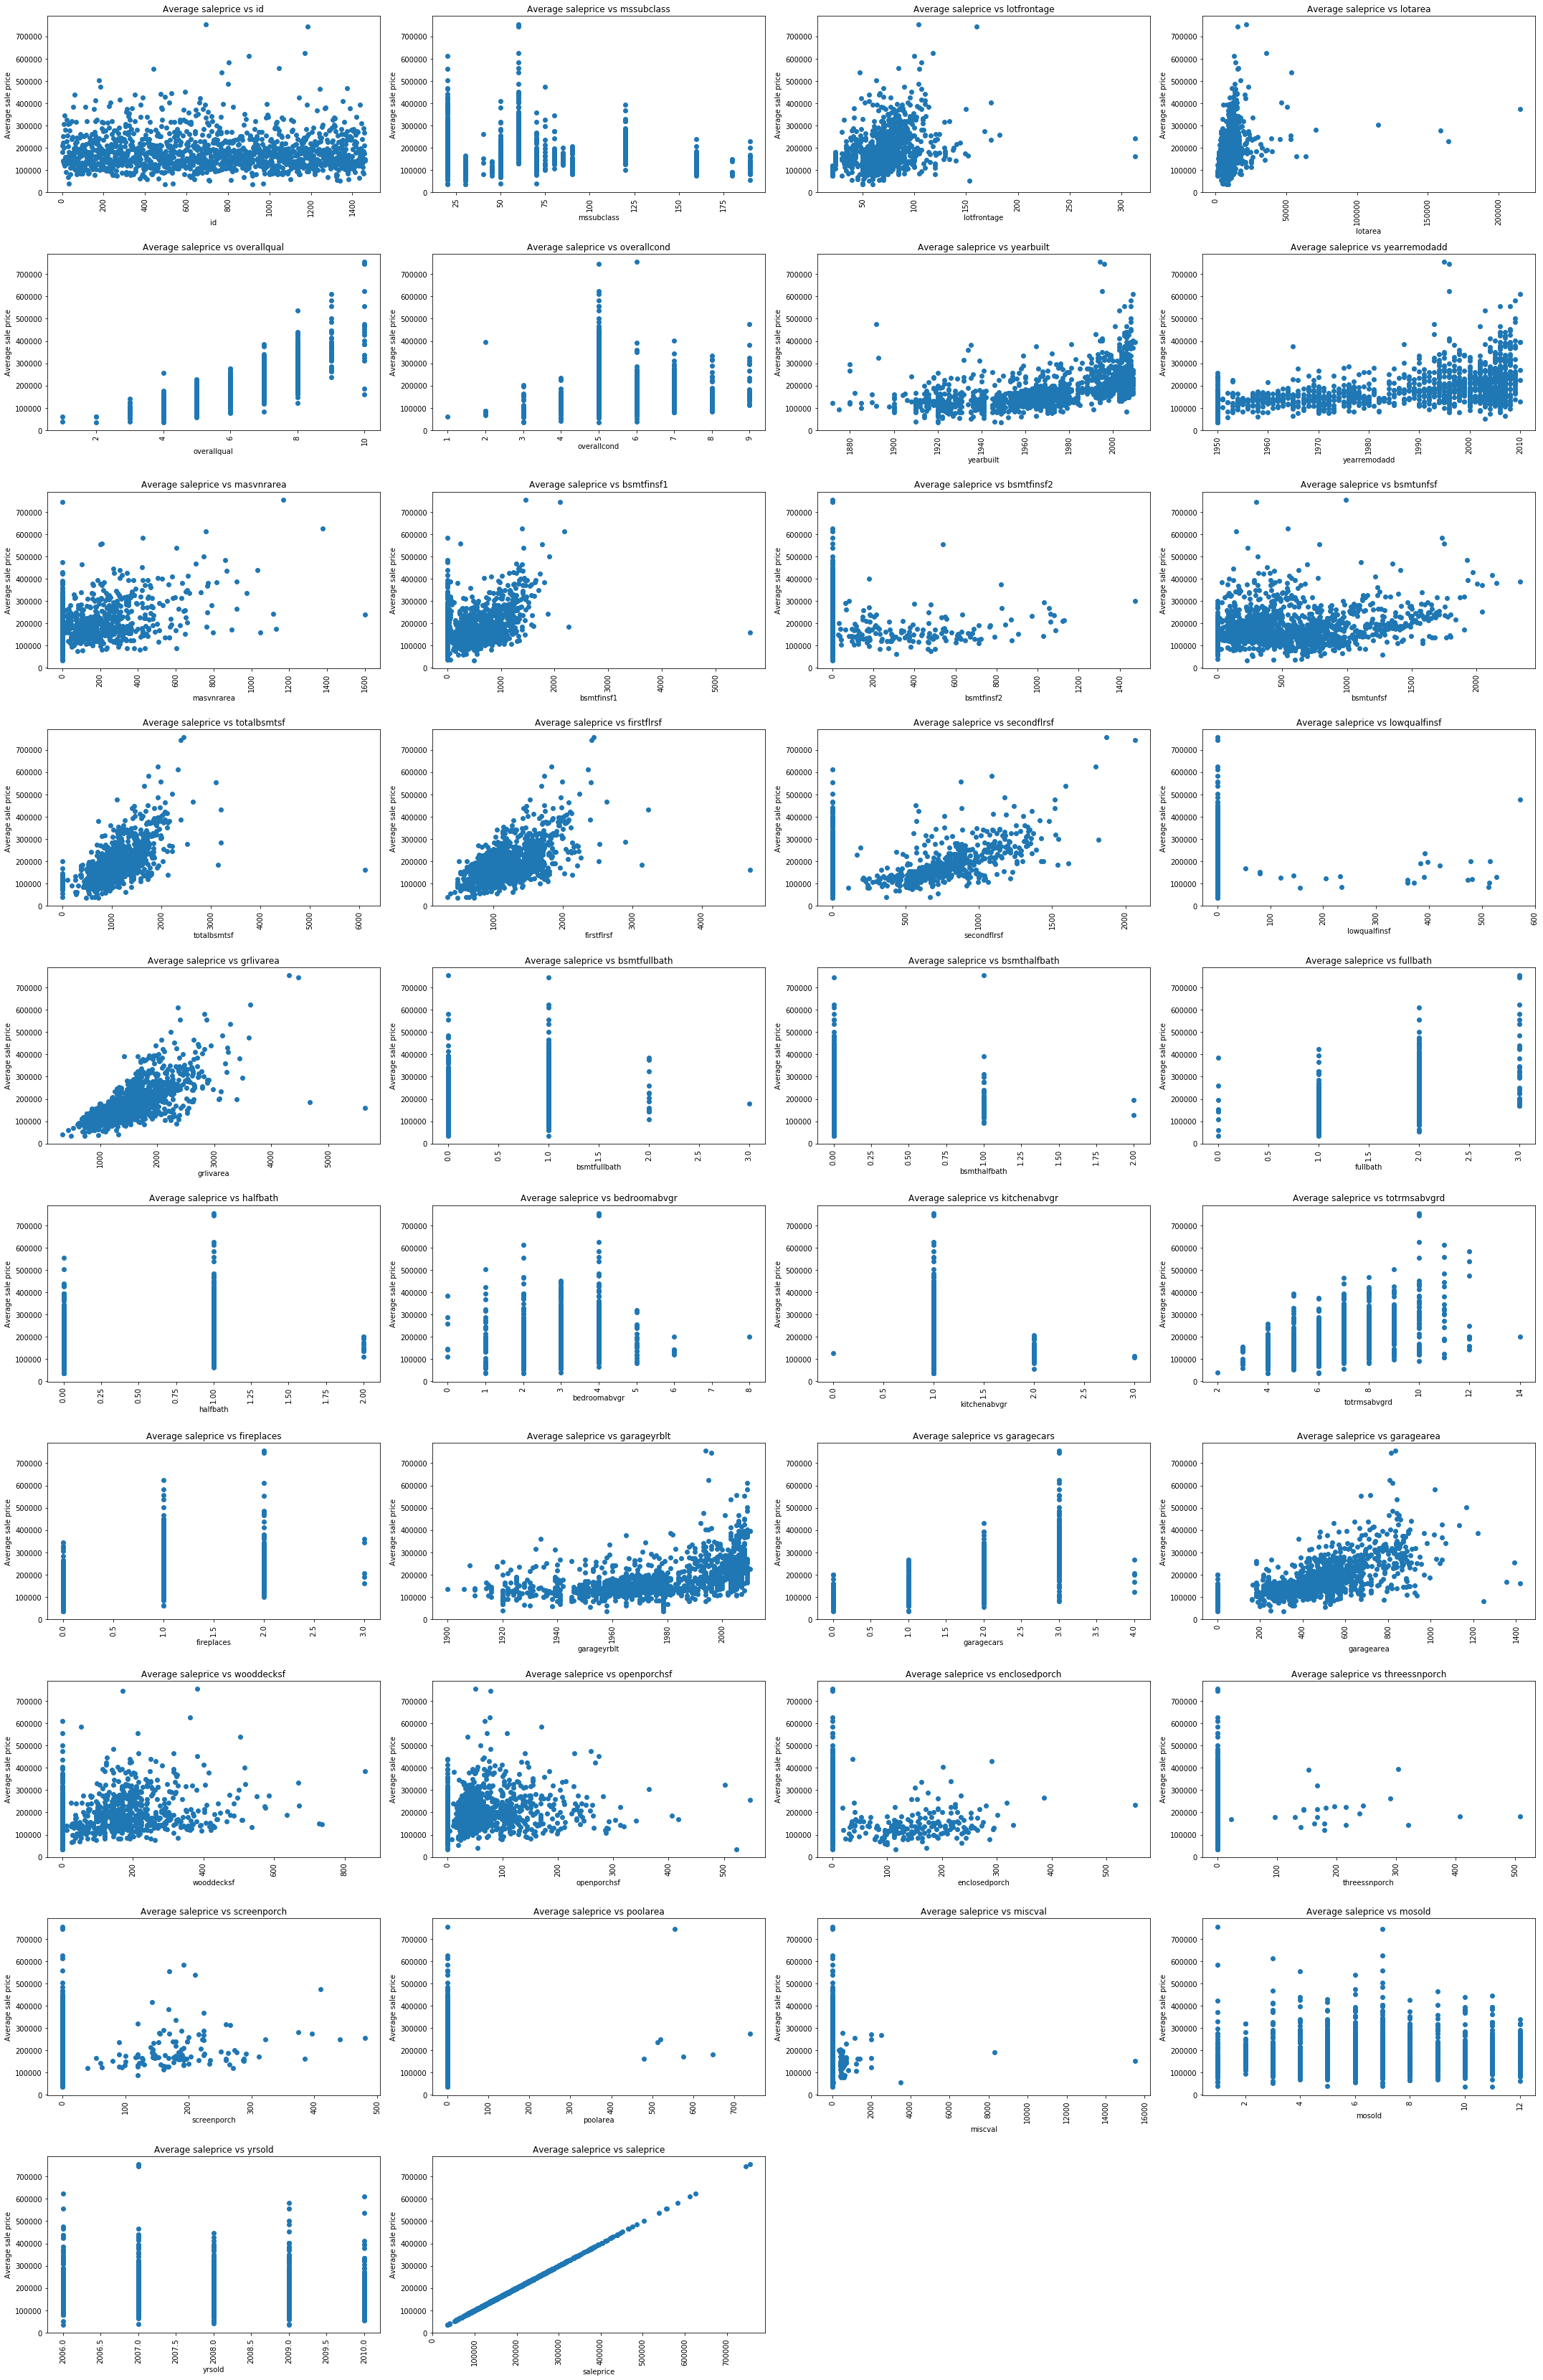

In [21]:
plt.figure(figsize=(30,50))

for i, column in enumerate(numeric_columns):
    plt.subplot(11,4,i+1)
    plt.scatter(df[column],df['saleprice'])
    plt.title(f"Average saleprice vs {column}")
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [22]:
df[numeric_columns].corr().loc[:,"saleprice"].sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.475241
garageyrblt      0.470177
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.334901
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

### Target vs categorical Features

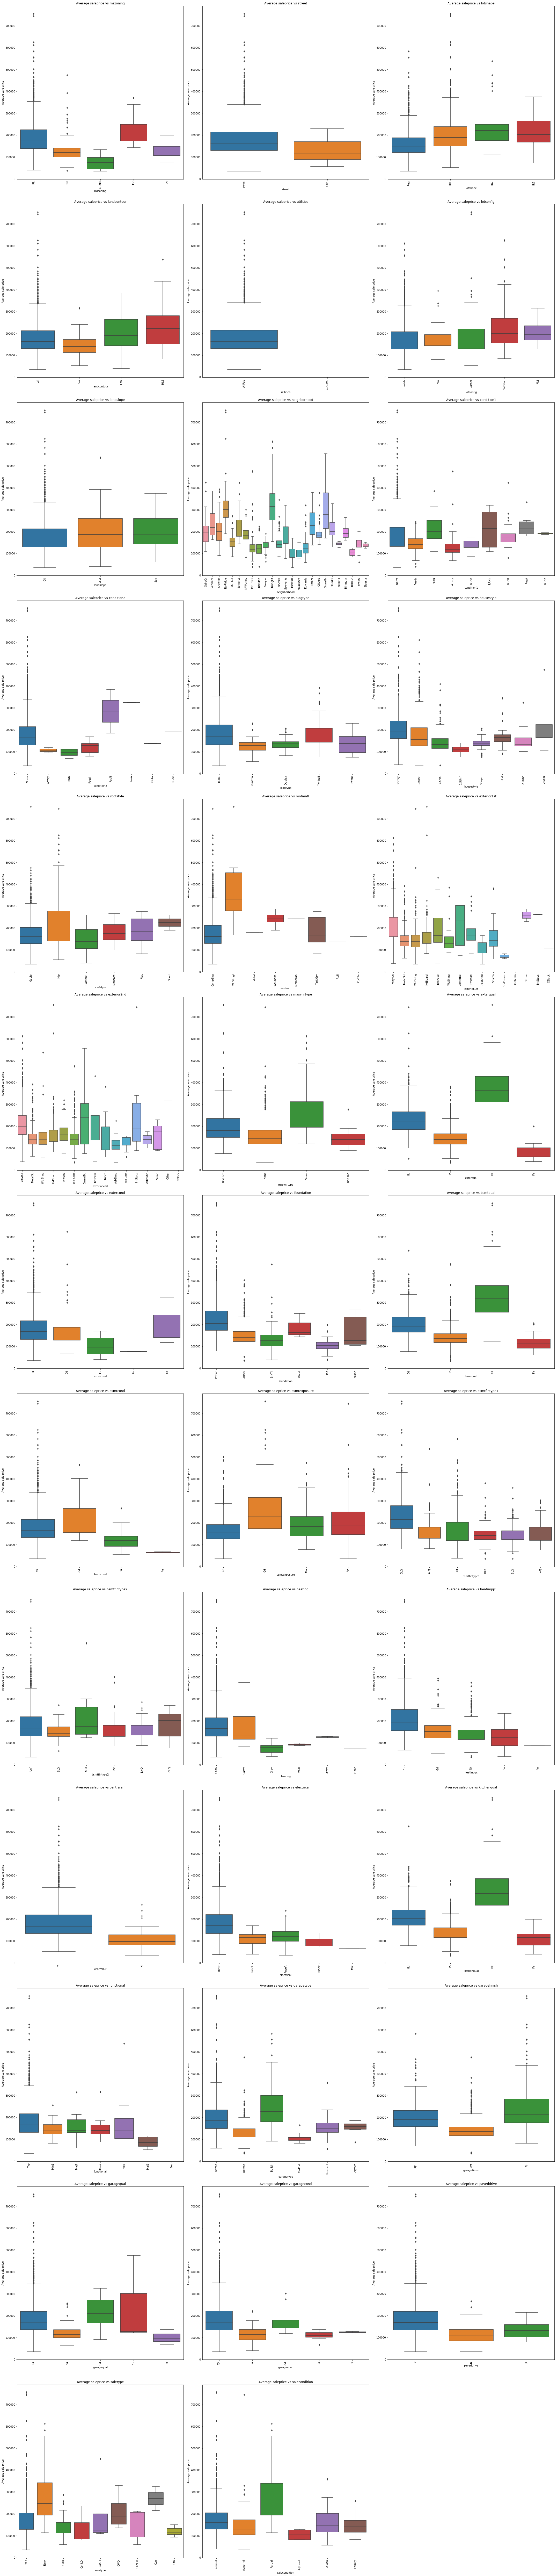

In [23]:
import seaborn as sns
plt.figure(figsize=(30,350))

for i, column in enumerate(categorical_columns):
    plt.subplot(33,3,i+1)
    sns.boxplot(df[column],df['saleprice'])
    plt.title(f"Average saleprice vs {column}")
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

# Building a regression model (estimation the model using OLS)

features - salecondition, overallqual      
grlivarea       
garagecars       
garagearea       
totalbsmtsf 
1stFlrSF, 2ndFlrSF will be combined

Text(0, 0.5, 'number of occurrence')

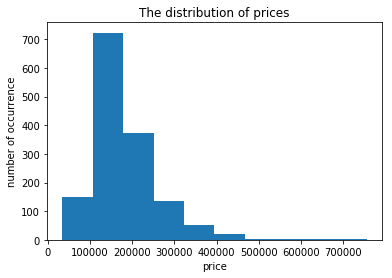

In [24]:
plt.hist(df.saleprice)
plt.title("The distribution of prices")
plt.xlabel("price")
plt.ylabel("number of occurrence")

In [25]:
# creating the total sq ft as a feature enginering process

df['flSF'] = df['firstflrsf'] + df['secondflrsf']

In [26]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['salecondition']= label_encoder.fit_transform(df['salecondition']) 
#df['LotArea']= label_encoder.fit_transform(df['LotArea']) 
df['bedroomabvgr']= label_encoder.fit_transform(df['bedroomabvgr']) 


## Run Regression

In [27]:
# Y is the target variable
Y = df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[['salecondition', 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'flSF']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 4.16443784e+03  2.29646935e+04 -3.00068553e+00  1.35985231e+04
  1.58500689e+01  3.12414144e+01  5.02871947e+01]

Intercept: 
 -110779.62762302285


SalePrice = - 110779.62762302285 + 4.16443784e+3 * 'salecondition' 2.29646935e+04 * 'overallqual' -3.00068553 * 'grlivarea' 1.35985231e+04 * 'garagecars' 1.58500689e+01 * 'garagearea' 3.12414144e+01 * 'totalbsmtsf' 5.02871947e+01 * 'flSF'

In [28]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     676.5
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:37:14   Log-Likelihood:                -17486.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1452   BIC:                         3.503e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.108e+05   5352.962    -20.695      0.000   -1.21e+05      -1e+05
salecondition  4164.4378    942.121      4.420      0.000    2316.375    6012.501
overallqual    2.296e+04   1071.927     21.424      0.000    2.09e+04    2.51e+04
grlivarea        -3.0007     21.016     -0.143      0.886     -44.226      38.224
garagecars      1.36e+04   3010.050      4.518      0.000    7694.012    1.95e+04
garagearea       15.8501     10.392      1.525      0.127      -4.535      36.235
totalbsmtsf      31.2414      2.883     10.836      0.000      25.586      36.897
flSF             50.2872     21.401      2.350      0.019       8.307      92.267
==============================================================================
Omnibus:                      465.395   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48725.337
Skew:                          -0.422   Prob(JB):                         0.00
Kurtosis:                      31.289   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption of linear regression

### Assumption one: linearity of the model in its coefficients

### Assumption two: the error term should be zero on average

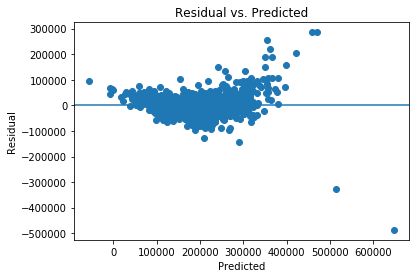

Mean of the errors in the sale price model is: 2.3123591321788424e-12


In [29]:
from sklearn import preprocessing 
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = np.array(Y) - predictions

# Residual Plot, We are looking for 2-D Symmetry
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


print("Mean of the errors in the sale price model is: {}".format(np.mean(errors)))

### Assumption three: homoscedasticity

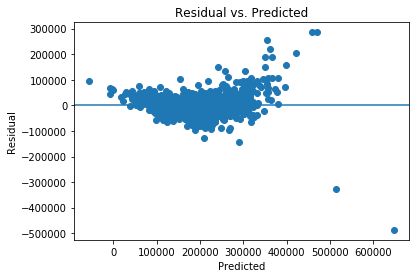

In [30]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [31]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 482.358 and p value is 6.56e-107
Levene test statistic value is 465.245 and p value is 7.26e-96


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis (Errors are Homeoscedastic) which means our errors are heteroscedastic.

### Assumption four: low multicollinearity

Text(0.5, 1.0, 'Correlation matrix')

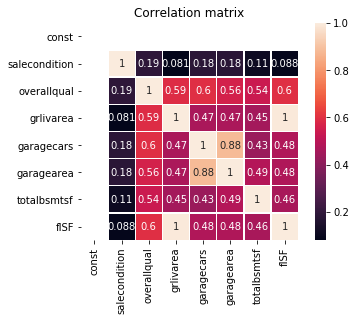

In [32]:
sns.heatmap(X.corr(), annot = True, linewidths = .3, square = True)
plt.title('Correlation matrix')

### Assumption five: error terms should be uncorrelated with one another

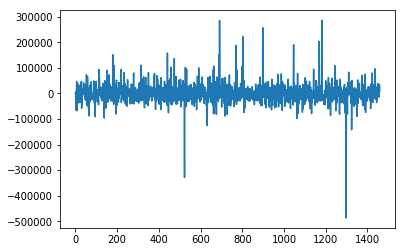

In [33]:
plt.plot(errors)

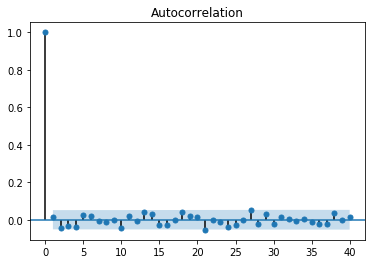

In [34]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(errors, lags=40 , alpha=0.05)
acf.show()

It seems that the error terms of our model are uncorrelated with each other.

### Assumption six: features shouldn't be correlated with the errors

In [35]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], errors)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: 1.0000
Variable: salecondition --- correlation: -0.0000, p-value: 1.0000
Variable: overallqual --- correlation: -0.0000, p-value: 1.0000
Variable: grlivarea --- correlation: -0.0000, p-value: 1.0000
Variable: garagecars --- correlation: -0.0000, p-value: 1.0000
Variable: garagearea --- correlation: -0.0000, p-value: 1.0000
Variable: totalbsmtsf --- correlation: -0.0000, p-value: 1.0000
Variable: flSF --- correlation: -0.0000, p-value: 1.0000


p-value = 1 so we can prove the null hypothesis (lack of correlation) for any pair.

### Assumption 7: normality of the errors

Jarque-Bera test statistics is 48725.33651509613 and p value is 0.0
Normality test statistics is 465.3945544518225 and p value is 8.726830621920768e-102


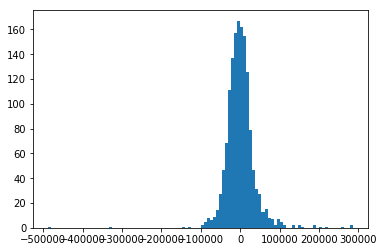

In [36]:
# Check if errors are normally distributed
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# Test whether distribution is Normal
# Null Hypo: Distribution is normal
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)
print(f"Jarque-Bera test statistics is {jb_stats[0]} and p value is {jb_stats[1]}")
print(f"Normality test statistics is {norm_stats[0]} and p value is {norm_stats[1]}")

# Plot distribution
plt.hist(errors, bins=100)
plt.show()

The p-values of both tests indicate that our errors are not normally distributed. Visually it looks like there is a slight skew to the right.

# Interpreting estimated coefficients

In [37]:
Y = df['saleprice']
X = df[['salecondition', 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'flSF']]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     676.5
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:37:16   Log-Likelihood:                -17486.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1452   BIC:                         3.503e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.108e+05   5352.962    -20.695      0.000   -1.21e+05      -1e+05
salecondition  4164.4378    942.121      4.420      0.000    2316.375    6012.501
overallqual    2.296e+04   1071.927     21.424      0.000    2.09e+04    2.51e+04
grlivarea        -3.0007     21.016     -0.143      0.886     -44.226      38.224
garagecars      1.36e+04   3010.050      4.518      0.000    7694.012    1.95e+04
garagearea       15.8501     10.392      1.525      0.127      -4.535      36.235
totalbsmtsf      31.2414      2.883     10.836      0.000      25.586      36.897
flSF             50.2872     21.401      2.350      0.019       8.307      92.267
==============================================================================
Omnibus:                      465.395   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48725.337
Skew:                          -0.422   Prob(JB):                         0.00
Kurtosis:                      31.289   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 1

In [38]:

label_encoder = preprocessing.LabelEncoder() 
  
df['salecondition']= label_encoder.fit_transform(df['salecondition']) 

df['flSF'] = df['firstflrsf'] + df['secondflrsf']
Y = df['saleprice']
X = df[['salecondition', 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'flSF']]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     676.5
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:37:16   Log-Likelihood:                -17486.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1452   BIC:                         3.503e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.108e+05   5352.962    -20.695      0.000   -1.21e+05      -1e+05
salecondition  4164.4378    942.121      4.420      0.000    2316.375    6012.501
overallqual    2.296e+04   1071.927     21.424      0.000    2.09e+04    2.51e+04
grlivarea        -3.0007     21.016     -0.143      0.886     -44.226      38.224
garagecars      1.36e+04   3010.050      4.518      0.000    7694.012    1.95e+04
garagearea       15.8501     10.392      1.525      0.127      -4.535      36.235
totalbsmtsf      31.2414      2.883     10.836      0.000      25.586      36.897
flSF             50.2872     21.401      2.350      0.019       8.307      92.267
==============================================================================
Omnibus:                      465.395   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48725.337
Skew:                          -0.422   Prob(JB):                         0.00
Kurtosis:                      31.289   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

grlivarea and garagearea are statistically insignificant. Hence we will exclude those.

In [39]:
Y = df['saleprice']
X = df[['salecondition', 'overallqual', 'garagecars', 'totalbsmtsf', 'flSF']]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     946.4
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:37:16   Log-Likelihood:                -17487.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1454   BIC:                         3.502e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.111e+05   5338.868    -20.817      0.000   -1.22e+05   -1.01e+05
salecondition  4224.3248    940.198      4.493      0.000    2380.035    6068.614
overallqual     2.29e+04   1071.239     21.378      0.000    2.08e+04     2.5e+04
garagecars     1.735e+04   1743.766      9.949      0.000    1.39e+04    2.08e+04
totalbsmtsf      32.1931      2.815     11.435      0.000      26.670      37.716
flSF             47.5299      2.512     18.919      0.000      42.602      52.458
==============================================================================
Omnibus:                      447.827   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44460.577
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                      30.025   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we have all variables statistically significant.  According to the estimation results:
- 1 point increase in salecondition results in \$4224 increase in sale price.
- 1 point increase in overallqual results in \$22900 increase in sale price.
- 1 point increase in garagecars results in \$17350 increase in sale price.
- 1 point increase in totalbsmtsf results in \$32 increase in sale price.
- 1 point increase in flSF results in \$47 increase in sale price.

Considering the results, the most prominent factors affecting the sale price seem to be the overallqual and the garagecars.

# Evaluating performance

- R-squared:	0.765
- Adj. R-squared:	0.764
- F-statistic:	676.5
- Prob (F-statistic):	0.00

- AIC:	3.499e+04
- BIC:	3.503e+04

According to the R-squared almost 77% of the variance in the target variable is explained by the model. Hence 23% of the variance in the target is not explained. In this sense, there is a large room for improvement.

In order to increase the goodness of fit of our model:

- We first log transform the dependent variable. The saleprice variable is not normally distributed, so log transforming may help in this regard. To this end, we apply log(1+x) transformation of NumPy.
- Second, we create another variable by summing up the basement
- Third, we add the interaction of the total area and the overall quality of the house.

# Model 2

In [40]:
df['total_flore'] = df['totalbsmtsf'] + df['flSF']
df['int_over_sf'] = df['overallqual'] * df['total_flore']
Y = np.log1p(df['saleprice'])

X = df[['salecondition', 'overallqual', 'garagecars', 'total_flore', 'int_over_sf']]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1246.
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:37:16   Log-Likelihood:                 483.97
No. Observations:                1460   AIC:                            -955.9
Df Residuals:                    1454   BIC:                            -924.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0716      0.054    188.013      0.000       9.967      10.177
salecondition     0.0312      0.004      7.350      0.000       0.023       0.039
overallqual       0.1860      0.009     21.796      0.000       0.169       0.203
garagecars        0.1070      0.008     13.567      0.000       0.092       0.122
total_flore       0.0004   2.17e-05     16.536      0.000       0.000       0.000
int_over_sf     -2.5e-05   2.82e-06     -8.851      0.000   -3.05e-05   -1.95e-05
==============================================================================
Omnibus:                      506.485   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4239.314
Skew:                          -1.377   Prob(JB):                         0.00
Kurtosis:                      10.881   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared:	0.811
Adj. R-squared:	0.810
F-statistic:	1246.
Prob (F-statistic):	0.00

AIC:	-955.9
BIC:	-924.2

1) R-sq in model 2 is higher. These are improvements upon the first model
2) AIC and BIC are lower
3) the higher F-statistic also indicates that the second model is better than the first one.
Hence second model is better.

#### Now, we split our data into train and test sets. Below, we set this parameter to 0.2, which means we'll use 20% of the data as the test set.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
Y = np.log1p(df['saleprice'])

X = df[['salecondition', 'overallqual', 'garagecars', 'total_flore', 'int_over_sf']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


Now we’ll fit the model on the training data:


In [87]:
from sklearn.linear_model import LinearRegression
# fit a model
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

How’d we do?
Let’s look at R^2 and Root Mean Squared Error (RMSE) to see how our model performed.

In [88]:
# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     989.6
Date:                Sun, 18 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:41:45   Log-Likelihood:                 391.11
No. Observations:                1168   AIC:                            -770.2
Df Residuals:                    1162   BIC:                            -739.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9838      0.060    166.249

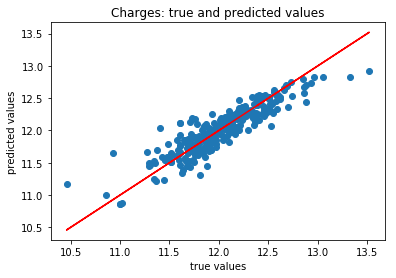

Mean absolute error of the prediction is: 0.13201280876662727
Mean squared error of the prediction is: 0.031539466659080584
Root mean squared error of the prediction is: 0.17759354340482253
Mean absolute percentage error of the prediction is: 1.103895593429044


In [89]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


the performance of your model is satisfactory. model achieves a good prediction performance in the test set.

# Trying Ridge regression

In [82]:
from sklearn.linear_model import RidgeCV
rg = RidgeCV(alphas = (1.0, 0.1, 0.005, 0.0025, 0.001, 0.00025, 0.0001), normalize = True)
model_cv = rg.fit(X_train, y_train)
model_cv.alpha_


0.0001

In [90]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [92]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8098175257817948
-----Test set statistics-----
R-squared of the model in test set is: 0.810852835544307
Mean absolute error of the prediction is: 0.13201280876660473
Mean squared error of the prediction is: 0.031539466659040956
Root mean squared error of the prediction is: 0.17759354340471095
Mean absolute percentage error of the prediction is: 1.103895593428944


In [91]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

ridgeregr = Ridge(alpha=0.00025) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


ValueError: Number of targets and number of penalties do not correspond: 50 != 1

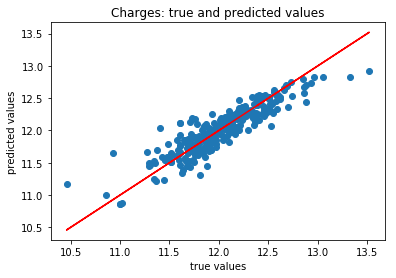

In [76]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

# Trying Lasso regression

In [93]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


In [96]:
lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_model.predict(X_train)
y_preds_test = lasso_model.predict(X_test)

print("Best alpha value is: {}".format(lasso_model.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_model.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8098175257817948
-----Test set statistics-----
R-squared of the model in test set is: 0.8108528356437191
Mean absolute error of the prediction is: 0.1320128087274584
Mean squared error of the prediction is: 0.03153946664246438
Root mean squared error of the prediction is: 0.17759354335804098
Mean absolute percentage error of the prediction is: 1.1038955931081582


In [94]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=alphas) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


TypeError: only size-1 arrays can be converted to Python scalars

# Trying ElasticNet regression

In [98]:
from sklearn.linear_model import ElasticNet

elasticNet_model = ElasticNetCV(alphas=alphas, cv=5) 
elasticNet_model.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticNet_model.predict(X_train)
y_preds_test = elasticNet_model.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticNet_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticNet_model.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.8098175257817948
-----Test set statistics-----
R-squared of the model on the test set is: 0.8108528356041034
Mean absolute error of the prediction is: 0.13201280874265098
Mean squared error of the prediction is: 0.03153946664907016
Root mean squared error of the prediction is: 0.17759354337663902
Mean absolute percentage error of the prediction is: 1.1038955932320018


Conclusion:
    OLS gives us the best result

# Let’s see how to do this with Sklearn.



In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=True,
                                                    test_size=0.5, random_state=49)
# Fit Model on Training Data
lr_split = LinearRegression(fit_intercept=True)
lr_split.fit(X_train, y_train)

#
